In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
%matplotlib inline 

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#from utility import FeatureGenerator
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.Chem.Subshape import SubshapeBuilder,SubshapeAligner,SubshapeObjects

#importing sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [2]:
from rdkit.Chem import AllChem
from rdkit import Chem
import pandas as pd

sol = pd.read_csv('D:/python/rdkit/new222.csv')
print(sol.head)
XY = sol.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                                          SMILES  \
0                                ClCC(Cl)(Cl)Cl   
1                                  CC(Cl)(Cl)Cl   
2                                ClC(Cl)C(Cl)Cl   
3                                    ClCC(Cl)Cl   
4                           FC(F)(Cl)C(F)(Cl)Cl   
...                                         ...   
2003   O=[N+]([O-])c1c(O)c(C)cc([N+](=O)[O-])c1   
2004      O=C(OC(C)(C)C)N[C@H](C(=O)O)Cc1ccccc1   
2005                        Cc1ccc(c2ccccc2)cc1   
2006    S(=O)(=O)(Nc1nc(OC)nc(OC)c1)c1ccc(N)cc1   
2007  Clc1c(S(=O)(=O)N)cc(C(=O)O)c(NCc2occc2)c1   

      measured log(solubility:mol/L)  
0                           -2.18000  
1                           -2.00000  
2                           -1.74000  
3                           -1.48000  
4                           -3.04000  
...                              ...  
2003                        -1.46000  
2004                        -2.15490  
2005  

In [3]:
y = sol.iloc[:,1]
y

0      -2.18000
1      -2.00000
2      -1.74000
3      -1.48000
4      -3.04000
         ...   
2003   -1.46000
2004   -2.15490
2005   -4.62000
2006   -2.96000
2007   -3.80528
Name: measured log(solubility:mol/L), Length: 2008, dtype: float64

In [5]:

X = []

for smile, Hlist in XY.items():
    
    try:
        X.append(AllChem.RDKFingerprint(Chem.MolFromSmiles(smile), minPath=1, maxPath=5,fpSize = 1024))

    except:
        pass
X = [list(a) for a in X]
print(len(X))


2008


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=338)

In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [9]:


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [10]:
Y_pred_train = model.predict(X_train)

In [11]:

print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (RMSE): 0.55
Coefficient of determination (R^2): 0.94


In [12]:
#predicts the X_test
Y_pred_test = model.predict(X_test)

In [13]:

print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (RMSE): 0.89
Coefficient of determination (R^2): 0.85


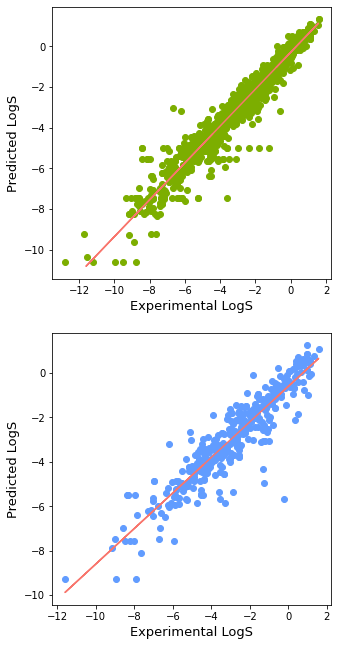

In [14]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS',fontsize=13)
plt.ylabel('Predicted LogS',fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS',fontsize=13)
plt.xlabel('Experimental LogS',fontsize=13)

#plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS rdkit.pdf',dpi=1200)
plt.show()

In [ ]:
from array import array

In [ ]:
#dtnew = Chem.MolFromSmiles('c1ccccc1CC1CC1')
dtnew =AllChem.RDKFingerprint(Chem.MolFromSmiles('c1ccccc1CC1CC1'), minPath=1, maxPath=5,fpSize = 1024)
dtnew

In [ ]:
Xnew=dtnew
ynew = model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
ynew

In [ ]:
model.feature_importances_

In [ ]:
import pandas as pd
from matplotlib import pyplot

importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [15]:
import shap
import os
import sys

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = X_test
Xscaler = StandardScaler()
X2= Xscaler.fit_transform(X)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X2)

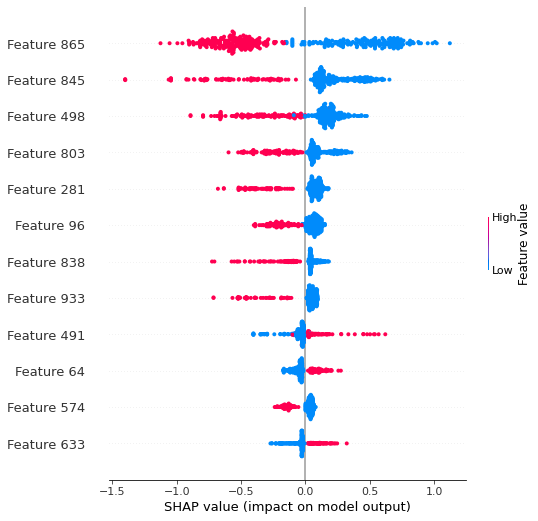

In [18]:
#shap.summary_plot(shap_values,X2, max_display=12)
#plt.savefig('summary rdkit.pdf',dpi=1200)
shap.summary_plot(shap_values, X2, plot_type="dot", plot_size=0.6, show=False,max_display=12)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

In [19]:
model.feature_importances_

array([0.00148304, 0.00077707, 0.00104935, ..., 0.00089973, 0.00046587,
       0.00606155])

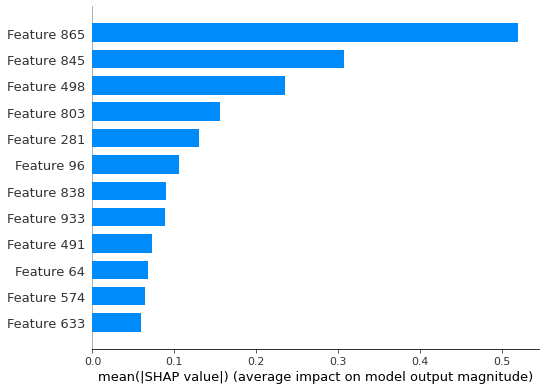

In [20]:
#shap.summary_plot(shap_values, max_display=12, plot_type="bar")
shap.summary_plot(shap_values, max_display=12, plot_type="bar",show=False)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

In [21]:
z=sol.iloc[:,0]
z

0                                  ClCC(Cl)(Cl)Cl
1                                    CC(Cl)(Cl)Cl
2                                  ClC(Cl)C(Cl)Cl
3                                      ClCC(Cl)Cl
4                             FC(F)(Cl)C(F)(Cl)Cl
                          ...                    
2003     O=[N+]([O-])c1c(O)c(C)cc([N+](=O)[O-])c1
2004        O=C(OC(C)(C)C)N[C@H](C(=O)O)Cc1ccccc1
2005                          Cc1ccc(c2ccccc2)cc1
2006      S(=O)(=O)(Nc1nc(OC)nc(OC)c1)c1ccc(N)cc1
2007    Clc1c(S(=O)(=O)N)cc(C(=O)O)c(NCc2occc2)c1
Name: SMILES, Length: 2008, dtype: object

In [ ]:
z[3]

In [22]:
from rdkit.Chem import rdMolDescriptors

In [23]:
w = Chem.MolFromSmiles(z[1977])
w

rdkbi = {}
rdkfp = Chem.RDKFingerprint(w, maxPath=5, bitInfo=rdkbi, fpSize = 1024)
# show 10 of the set bits:
list(rdkfp.GetOnBits())[:]
    



[0,
 2,
 3,
 5,
 11,
 23,
 24,
 25,
 26,
 27,
 35,
 36,
 37,
 38,
 40,
 41,
 46,
 47,
 50,
 51,
 58,
 64,
 68,
 70,
 76,
 77,
 81,
 83,
 85,
 91,
 93,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 104,
 110,
 111,
 112,
 114,
 116,
 117,
 118,
 119,
 120,
 123,
 124,
 128,
 131,
 132,
 139,
 142,
 143,
 147,
 149,
 150,
 160,
 161,
 162,
 163,
 165,
 166,
 167,
 170,
 171,
 180,
 184,
 185,
 189,
 192,
 194,
 195,
 197,
 205,
 206,
 209,
 219,
 229,
 231,
 232,
 235,
 239,
 240,
 242,
 245,
 246,
 247,
 251,
 252,
 253,
 255,
 259,
 262,
 263,
 264,
 266,
 276,
 277,
 279,
 281,
 282,
 284,
 285,
 288,
 289,
 294,
 301,
 302,
 305,
 309,
 313,
 315,
 320,
 321,
 322,
 324,
 326,
 330,
 331,
 332,
 338,
 339,
 344,
 346,
 350,
 363,
 373,
 376,
 377,
 380,
 381,
 382,
 384,
 385,
 386,
 387,
 388,
 390,
 398,
 399,
 400,
 404,
 406,
 407,
 408,
 411,
 412,
 415,
 418,
 420,
 424,
 433,
 435,
 440,
 441,
 449,
 453,
 454,
 458,
 459,
 460,
 461,
 463,
 470,
 472,
 473,
 474,
 475,
 476,
 4

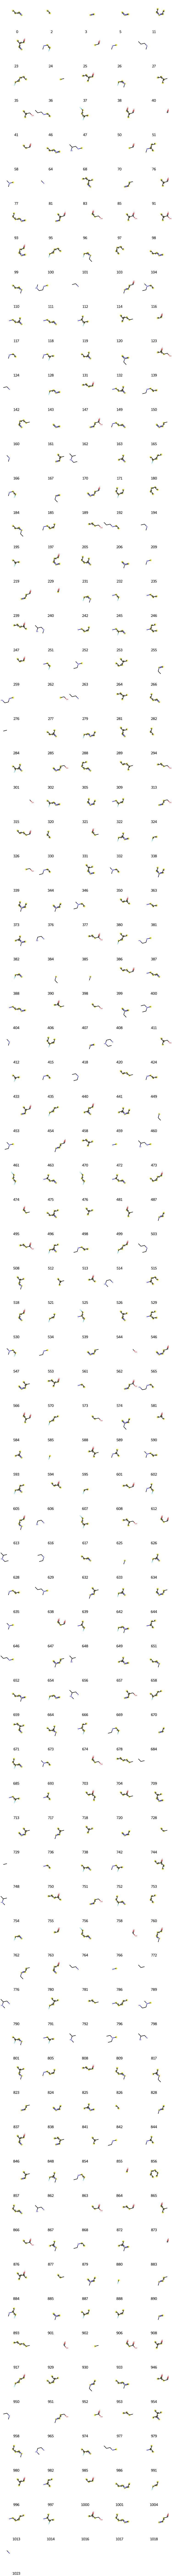

In [24]:
tpls = [(w,x,rdkbi) for x in rdkbi]
p=Draw.DrawRDKitBits(tpls[:],molsPerRow=5,legends=[str(x) for x in rdkbi][:])
dpi=1200
p



In [25]:
sol2 = pd.read_csv('D:/python/rdkit/testexperiment2upload.csv')
print(sol2.head)
XY2 = sol2.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                      Substance  \
0                     atropine   
1                   carvedilol   
2               chlorpropamide   
3                 enrofloxacin   
4                metronidazole   
5               nalidixic_acid   
6               nitrofurantoin   
7               sulfamethazine   
8                       thymol   
9   trichloromethiazide_form_I   

                                              SMILES  rdkit  morgan  \
0  CN1[C@H]2CC[C@@H]1C[C@@H](C2)OC(=O)C(CO)C1=CC=...  -2.14   -1.90   
1        COc1ccccc1OCCNCC(O)COc1cccc2[nH]c3ccccc3c12  -4.28   -4.27   
2                    Clc1ccc(S(=O)(NC(=O)NCCC)=O)cc1  -3.33   -3.53   
3   CCN1CCN(CC1)c1c(cc2c(n(cc(C(=O)O)c2=O)C2CC2)c1)F  -3.27   -3.34   
4                               OCCn1c(ncc1N(=O)=O)C  -1.22   -1.25   
5                    CCn1cc(c(=O)c2ccc(nc12)C)C(=O)O  -3.41   -3.52   
6                 O=C1NC(CN1\N=C\c1ccc(N(=O)=O)o1)=O  -3.18   -3.13   
7              S(=O)(=O)(Nc

In [26]:
#y = []
X3 = []
#bi = {}

for smile, Hlist in XY2.items():
    
    try:
        X3.append(AllChem.RDKFingerprint(Chem.MolFromSmiles(smile), minPath=1, maxPath=5,fpSize = 1024))
  #      y.append(Hlist[0])
    except:
        pass
X3 = [list(b) for b in X3]
print(len(X3))

10


In [27]:
Xnew=X3
ynew = model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
ynew

array([-2.13862588, -4.2782602 , -3.32614208, -3.2660158 , -1.21877079,
       -3.4079269 , -3.18347017, -2.75152065, -2.46155333, -3.09496723])

In [ ]:

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(ynew)
# save to csv file
savetxt('data.csv', data, delimiter=',')

In [ ]:
df_ynew = pd.DataFrame(ynew, columns=['solubility'])
df_ynew

In [ ]:
df=sol2.iloc[:,:2]
df

In [ ]:
T = pd.concat([df,df_ynew], axis=1)
T

In [ ]:

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(ynew)
# save to csv file
savetxt('data.csv', data, delimiter=',')